In [1]:
### Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,accuracy_score
pd.set_option("display.precision",2)        ## Age in Decimal format should convert int format

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
## Data uploading
titanic=sns.load_dataset("titanic")
data=titanic.copy()
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True


In [4]:
### Data Preprocessing
data.drop(['embarked','who','adult_male','deck','alive'],axis=1,inplace=True)
data['age']=data['age'].fillna(data['age'].mean())
data['embark_town']=data['embark_town'].fillna('Southampton')
data['alone']=data['alone'].astype('int')
d={'male':1,'female':0}
data['sex']=data['sex'].map(d)
dum1=pd.get_dummies(data['class'])
data1=pd.concat([data,dum1],axis=1)
data1.drop('class',axis=1,inplace=True)
dum2=pd.get_dummies(data['embark_town'])
data2=pd.concat([data1,dum2],axis=1)
data2.drop('embark_town',axis=1,inplace=True)
data2

,survived,pclass,sex,age,sibsp,parch,fare,alone,First,Second,Third,Cherbourg,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.25,0,0,0,1,0,0,1
1,1,1,0,38.0,1,0,71.28,0,1,0,0,1,0,0
2,1,3,0,26.0,0,0,7.92,1,0,0,1,0,0,1
3,1,1,0,35.0,1,0,53.10,0,1,0,0,0,0,1
4,0,3,1,35.0,0,0,8.05,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.00,1,0,1,0,0,0,1
887,1,1,0,19.0,0,0,30.00,1,1,0,0,0,0,1
888,0,3,0,29.7,1,2,23.45,0,0,0,1,0,0,1
889,1,1,1,26.0,0,0,30.00,1,1,0,0,1,0,0


In [5]:
# Survived and not survived count
data.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

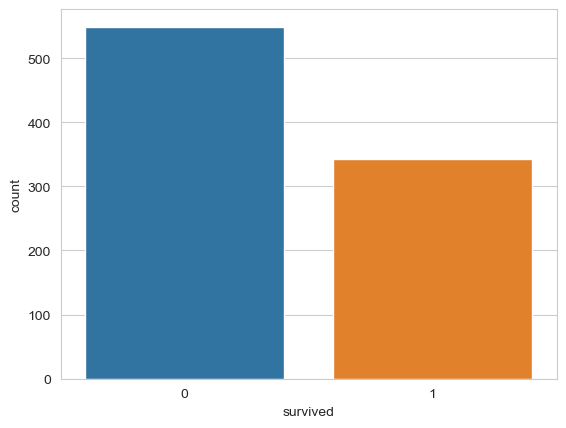

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=data)

<AxesSubplot:>

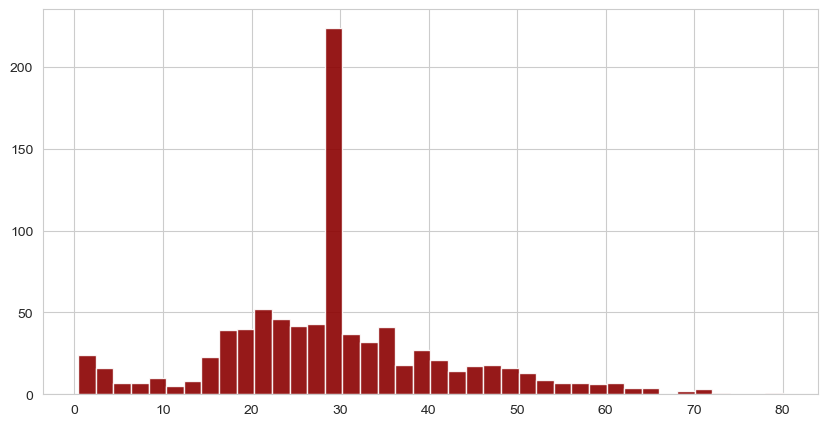

In [10]:
## No of people with Age Group
data['age'].hist(bins=40,color='darkred',alpha=0.9,figsize=(10,5))

In [11]:
### Over which class of people survived or not
data.groupby(['class','survived']).size()

class   survived
First   0            80
        1           136
Second  0            97
        1            87
Third   0           372
        1           119
dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

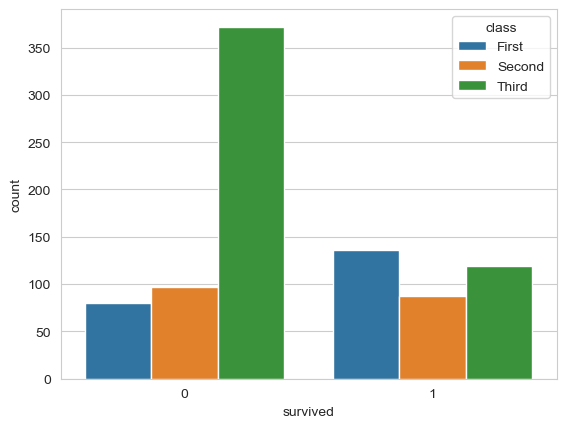

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='class',data=data)

From this countplot we found information that, The most of passenger are not survived who are in class 3 than class 1&2 and most of them are survived who are in class 1.

In [13]:
### male and female category who survived or not
data.groupby(['sex','survived']).size()

sex  survived
0    0            81
     1           233
1    0           468
     1           109
dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

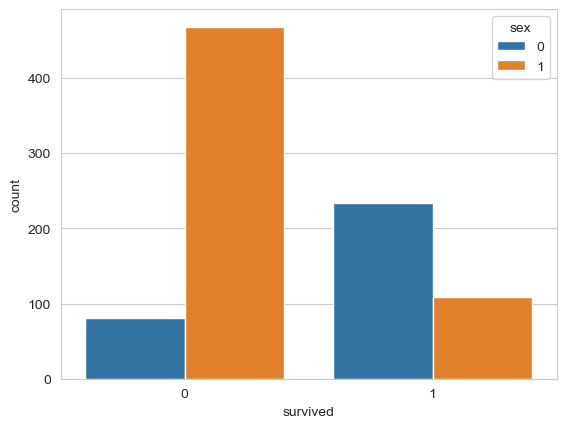

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=data)

In [15]:
data.groupby(['embark_town','survived']).size()

embark_town  survived
Cherbourg    0            75
             1            93
Queenstown   0            47
             1            30
Southampton  0           427
             1           219
dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

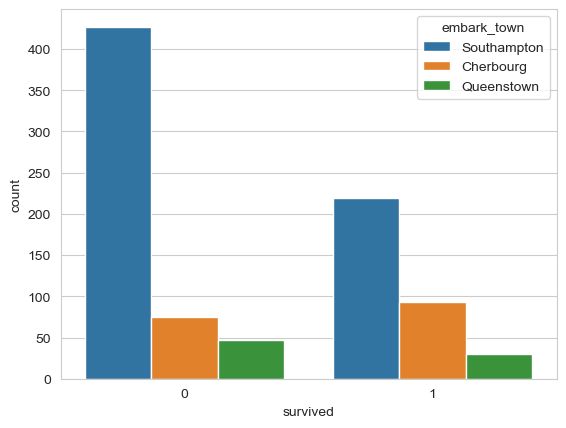

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='embark_town',data=data)

In [17]:
data.embark_town.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

<AxesSubplot:>

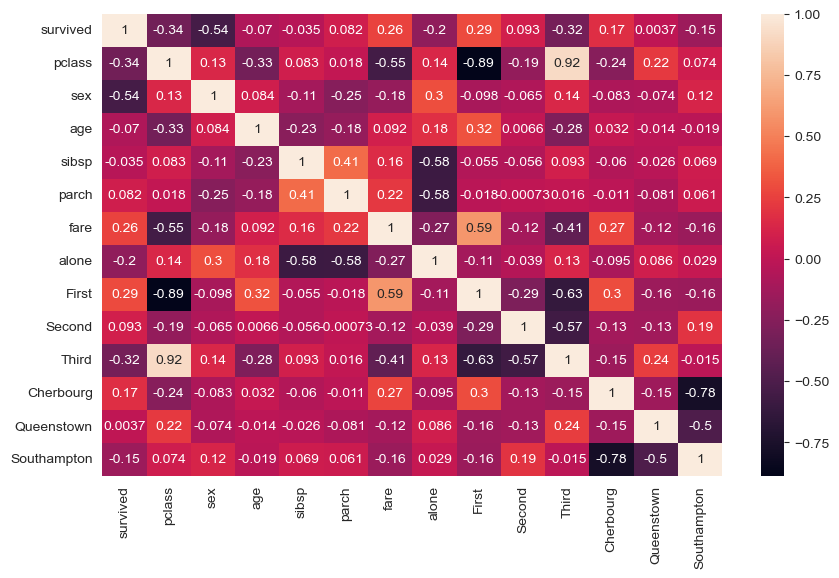

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data2.corr(),annot=True)

In [19]:
data2.corr()['survived']

survived       1.00e+00
pclass        -3.38e-01
sex           -5.43e-01
age           -6.98e-02
sibsp         -3.53e-02
parch          8.16e-02
fare           2.57e-01
alone         -2.03e-01
First          2.86e-01
Second         9.33e-02
Third         -3.22e-01
Cherbourg      1.68e-01
Queenstown     3.65e-03
Southampton   -1.50e-01
Name: survived, dtype: float64

In [20]:
def data_model_preparation(data2):
    X=data2.drop('survived',axis=1)
    y=data2[['survived']]
    st=StandardScaler()
    X_transform=st.fit_transform(X)
    X_data=pd.DataFrame(X_transform,columns=X.columns)
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=0.3,random_state=1234)
    return X_train,X_test,y_train,y_test

In [21]:
print("Data model prepartion is started")
X_train,X_test,y_train,y_test=data_model_preparation(data2)


Data model prepartion is started


In [146]:
def model_building(X_train,y_train,X_test,y_test):
    model_log=LogisticRegression()
    model_knn=KNeighborsClassifier(n_neighbors=3)
    model_ds=DecisionTreeClassifier()
    model_rf=RandomForestClassifier()

    print("Model Training is started")
    model_log_train=model_log.fit(X_train,y_train)
    model_knn_train=model_knn.fit(X_train,y_train)
    model_ds_train=model_ds.fit(X_train,y_train)
    model_rf_train=model_rf.fit(X_train,y_train)

    print("Model Predicted started")
    model_log_predict=model_log_train.predict(X_test)
    model_knn_predict=model_knn_train.predict(X_test)
    model_ds_predict=model_ds_train.predict(X_test)
    model_rf_predict=model_rf_train.predict(X_test)

    print("confusion matrix and Accuracy")
    acc_log=accuracy_score(y_test,model_log_predict)*100
    print("The Accuacy of Logistic Regression is-",round(acc_log,2))
    acc_knn=accuracy_score(y_test,model_knn_predict)*100
    print("The Accuacy of knn is-",round(acc_knn,2))
    acc_ds=accuracy_score(y_test,model_ds_predict)*100
    print("The Accuacy of  Decision tree is-",round(acc_ds,2))
    acc_rf=accuracy_score(y_test,model_rf_predict)*100
    print("The Accuacy of Random forest is-",round(acc_rf,2))
    return acc_log,acc_knn,acc_ds,acc_rf


In [147]:
acc_log,acc_knn,acc_ds,acc_rf=model_building(X_train,y_train,X_test,y_test)


Model Training is started
Model Predicted started
confusion matrix and Accuracy
The Accuacy of Logistic Regression is- 83.58
The Accuacy of knn is- 77.99
The Accuacy of  Decision tree is- 78.36
The Accuacy of Random forest is- 81.72
